# Training Digit Recognition Analog

This notebook is used to train a CNN to detect the digit given the processed cropped image.

### Mount to Collab Folder

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Load Dependencies

In [2]:
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Conv2D, MaxPooling2D, Conv3D, MaxPooling3D, Dropout
from keras.models import Model, Sequential
from keras import layers
import numpy as np
import pandas as pd
import os
from random import shuffle
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import tensorflow as tf
import cv2

Using TensorFlow backend.


### Define Function to Load Images into a list

Inputs : Location of Files

In [0]:
# Load images from a location
def load_image(loc):
    """
    Using the OpenCV package to load a set of images and return a list of their arrays
    
    Arguments - 
    loc - Location of a set of Processed Image Files
    
    Returns -
    templist - List of image arrays
    """
    templist = []
    for file in os.listdir(loc):
        if "png" in file or 'jpg' in file:
            try:
              img_tc1 = cv2.imread(loc+file)
              templist.append(img_tc1)
            except:
              a = 1
    return templist






## Load Cropped Digit Images for Analog Readings into the notebook

In [0]:
# Setting Locations

# Training Data Directory
analog_dir_tr = "/content/drive/My Drive/Team Bergere/Optimizer/Data/optimizer/HQ_analog/Split/Train_proc/Combined_with_Aug/"

# Validation Data Directory
analog_dir_ts = "/content/drive/My Drive/Team Bergere/Optimizer/Data/optimizer/HQ_analog/Split/Test_proc_res/"


In [0]:
"""
Folder structure includes one folder for each class, containing the images falling within that class. 

There are 11 folders ranging from 0 to 10, referring to each digit, with 10 referring to no digit or just noise.

"""


# Define a dictionary of classes (0 to 10)

classrange_a = dict()

for i in range(11):
    classrange_a[i] = str(i)+'/'



### Load Data from Training Folder

In [0]:
# Training Set
analog_set_tr = list() # List to contain all training image arrays
img_analog_class = dict() # Dictionary to contain all training image arrays split by class


# Load Data into dictionary
for i in range(11):
    img_analog_class[i] = load_image(analog_dir_tr+classrange_a[i])

    
# Test for badly loaded files    
for i in img_analog_class.keys():
  img_analog_class[i] = [x for x in img_analog_class[i] if x is not None]

  
# Split Dictionary into List
for k in img_analog_class.keys():
  for i in img_analog_class[k]:
    analog_set_tr.append(i)




### Load Data from Validation Folder

In [0]:
    
# Validation Set
analog_set_ts = list() # List to contain all validation image arrays
img_analog_class_t = dict() # Dictionary to contain all validation image arrays split by class


# Load Data into dictionary
for i in range(11):
    img_analog_class_t[i] = load_image(analog_dir_ts+classrange_a[i])
  

# Test for badly loaded files    
for i in img_analog_class_t.keys():
  img_analog_class_t[i] = [x for x in img_analog_class_t[i] if x is not None]
  
  
# Split Dictionary into List    
for k in img_analog_class_t.keys():
  for i in img_analog_class_t[k]:
    analog_set_ts.append(i)

### Generate Training and Validation labels based on loaded Data

In [22]:
"""
Training and validation labels contain the classes that the individual images fall into.

These will be arrays with values of 11 classes from 0 to 10

"""

# Generate array with labels
labels_analog_tr = np.concatenate(((np.repeat(0,len(img_analog_class[0]))),
                                 (np.repeat(1,len(img_analog_class[1]))),
                                 (np.repeat(2,len(img_analog_class[2]))),
                                 (np.repeat(3,len(img_analog_class[3]))),
                                 (np.repeat(4,len(img_analog_class[4]))),
                                 (np.repeat(5,len(img_analog_class[5]))),
                                 (np.repeat(6,len(img_analog_class[6]))),
                                 (np.repeat(7,len(img_analog_class[7]))),
                                 (np.repeat(8,len(img_analog_class[8]))),
                                 (np.repeat(9,len(img_analog_class[9]))),
                               (np.repeat(10,len(img_analog_class[10])))))


labels_analog_ts = np.concatenate(((np.repeat(0,len(img_analog_class_t[0]))),
                                 (np.repeat(1,len(img_analog_class_t[1]))),
                                 (np.repeat(2,len(img_analog_class_t[2]))),
                                 (np.repeat(3,len(img_analog_class_t[3]))),
                                 (np.repeat(4,len(img_analog_class_t[4]))),
                                 (np.repeat(5,len(img_analog_class_t[5]))),
                                 (np.repeat(6,len(img_analog_class_t[6]))),
                                 (np.repeat(7,len(img_analog_class_t[7]))),
                                 (np.repeat(8,len(img_analog_class_t[8]))),
                                 (np.repeat(9,len(img_analog_class_t[9]))),
                               (np.repeat(10,len(img_analog_class_t[10])))))


len(labels_analog_tr)

5674

### Shuffle training sets to improve the learning

In [12]:

# Shuffle the training data and lables together                                  
temp_list = list(zip(analog_set_tr,labels_analog_tr))
shuffle(temp_list)
analog_set_tr, labels_analog_tr = zip(*temp_list)

# Process into required formats
labels_analog_tr = np.array(labels_analog_tr)
analog_set_tr = list(analog_set_tr)

len(labels_analog_tr)


                                  


5674

#### Example of the Training Image

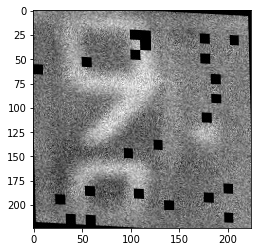

In [13]:
fig, ax = plt.subplots()
ax.imshow(analog_set_tr[0])

In [14]:
# Check if the Training and Validation sets have correct number of labels

len(analog_set_tr),len(labels_analog_tr),len(analog_set_ts),len(labels_analog_ts)

(5674, 5674, 111, 111)

## Generate CNN Model

### Convert the Training and Validation sets to 4 dimensional arrays

In [15]:
"""
Inputs to the model need to be 4 dimensional arrays instead of a list of arrays. 

This is rectified by conversion using np.stack

"""

x_train = np.stack(analog_set_tr)
x_test = np.stack(analog_set_ts)

x_train.shape,x_test.shape


((5674, 224, 224, 3), (111, 224, 224, 3))

### Generate Sequential Model

Architecture -

1) Convolutional Layer with 3x3 filter and rectified linear unit activation

2) Convolutional Layer with 3x3 filter and rectified linear unit activation

3) Pooling with size 2x2

4) 0.25 Dropout to enhance convergence

5) Flatten to 1D and run through Dense Layer with relu

5) 0.5 Dropout

6) Dense with 11 output classes and softmax activation

In [0]:
model = None

In [17]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, 3, 3, input_shape = (224,224,3), activation = tf.nn.relu))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(11, activation=tf.nn.softmax))

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Train the Model using the Training data and labels

In [18]:
callback = []

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/Team Bergere/Optimizer/Notebooks/Models/model_analog_v1_.{epoch:02d}.h5',
                                               monitor='loss',
                                               save_best_only=False,
                                               verbose=2)


callback.append(checkpointer)

model.fit(x_train,labels_analog_tr,epochs=15,validation_data=(x_test,labels_analog_ts),callbacks=callback)

Train on 5674 samples, validate on 111 samples
Epoch 1/15
5632/5674 [============================>.] - ETA: 0s - loss: 8.9224 - acc: 0.2891
Epoch 00001: saving model to /content/drive/My Drive/Team Bergere/Optimizer/Notebooks/Models/model_analog_v1_.01.h5
5674/5674 [==============================] - 13s 2ms/sample - loss: 8.8675 - acc: 0.2903 - val_loss: 1.9154 - val_acc: 0.3063
Epoch 2/15
5632/5674 [============================>.] - ETA: 0s - loss: 1.4305 - acc: 0.5323
Epoch 00002: saving model to /content/drive/My Drive/Team Bergere/Optimizer/Notebooks/Models/model_analog_v1_.02.h5
5674/5674 [==============================] - 9s 2ms/sample - loss: 1.4259 - acc: 0.5340 - val_loss: 1.3377 - val_acc: 0.6306
Epoch 3/15
5664/5674 [============================>.] - ETA: 0s - loss: 1.1105 - acc: 0.6324
Epoch 00003: saving model to /content/drive/My Drive/Team Bergere/Optimizer/Notebooks/Models/model_analog_v1_.03.h5
5674/5674 [==============================] - 10s 2ms/sample - loss: 1.1092 

### Selection of Model was done on the basis of -

1) Taking into account best performance of the validation set

2) Looking at the tendency of the model to overfit on the training data


#### Hence the 8th epoch was picked as the digit recognition model

In [19]:
taken_model = tf.keras.models.load_model('/content/drive/My Drive/Team Bergere/Optimizer/Notebooks/Models/model_analog_v1_.08.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Test Model Accuracy on the Validation Set

In [20]:
taken_model.evaluate(x_test,labels_analog_ts)

111/111 [==============================] - 0s 1ms/sample - loss: 1.4002 - acc: 0.7387


[1.400225773587957, 0.7387387]

#### The Model evaluates at 74.9% on the validation set

### Class-wise Evaluation of accuracy

In [21]:
res = dict()

for i in range(11):
  img_set = list()
  img_val = list()
  counter = 0
  for el in img_analog_class_t[i]:
    img_set.append(el)
    img_val.append(i)
  
  img_set = np.stack(img_set)
  img_val = np.asarray(img_val)
  
  res[i] = model.evaluate(img_set,img_val)
  
res

11/11 [==============================] - 0s 6ms/sample - loss: 0.3333 - acc: 0.8182


{0: [0.23062041401863098, 0.9],
 1: [2.2361953258514404, 0.8],
 2: [1.2976977825164795, 0.7],
 3: [0.7599077820777893, 0.7],
 4: [1.4150768518447876, 0.8],
 5: [4.235431671142578, 0.6],
 6: [1.1503055095672607, 0.7],
 7: [2.0374515056610107, 0.9],
 8: [4.385002613067627, 0.3],
 9: [3.3453915119171143, 0.6],
 10: [0.333346962928772, 0.8181818]}

### Result - The model is trained on the Analog data + Augmented Data and evaluates at 74% on the validation set. Classwise accuracies are more or less consistent, with class 8 being slightly bad.

### In any case, this model will be taken as the best case for Analog predictions